### 02.1 线性反向传播

<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC1%E6%AD%A5%20-%20%E5%9F%BA%E6%9C%AC%E7%9F%A5%E8%AF%86/img/2/flow2.png"/>

设置初始值和目标：

In [1]:
import matplotlib.pyplot as plt
import numpy as np

w = 3
b = 4
t = 150

通过$w$和$b$获得网络输出的目标值：

In [2]:
def target_function(w,b):
    x = 2*w+3*b
    y=2*b+1
    z=x*y
    return x,y,z

设置可以接受的误差最大值：

In [3]:
error = 1e-5

#### 02.1.1 单变量反向传播

关于反向传播求解$b$的公式：
$$
\frac{\partial{z}}{\partial{b}}=\frac{\partial{z}}{\partial{x}} \cdot \frac{\partial{x}}{\partial{b}}+\frac{\partial{z}}{\partial{y}}\cdot\frac{\partial{y}}{\partial{b}}=y \cdot 3+x \cdot 2=63 \tag{7}
$$

In [4]:
plot_z = []
while(True):
    #获取输出的x,y,z目标值
    x,y,z = target_function(w,b)
    #计算z的差值
    delta_z = z - t
    plot_z.append(z)
    print("w=%f,b=%f,z=%f,delta_z=%f"%(w,b,z,delta_z))
    #检测误差范围
    if abs(delta_z) < error:
        break
    #使用上述公式手工计算出贡献值是63
    delta_b = delta_z /63
    print("delta_b=%f"%delta_b)
    b = b - delta_b

print("done!")
print("final b=%f"%b)
print(plot_z)

w=3.000000,b=4.000000,z=162.000000,delta_z=12.000000
delta_b=0.190476
w=3.000000,b=3.809524,z=150.217687,delta_z=0.217687
delta_b=0.003455
w=3.000000,b=3.806068,z=150.007970,delta_z=0.007970
delta_b=0.000127
w=3.000000,b=3.805942,z=150.000294,delta_z=0.000294
delta_b=0.000005
w=3.000000,b=3.805937,z=150.000011,delta_z=0.000011
delta_b=0.000000
w=3.000000,b=3.805937,z=150.000000,delta_z=0.000000
done!
final b=3.805937
[162, 150.2176870748299, 150.00796958043605, 150.00029448706576, 150.00001088538508, 150.0000004023711]


迭代6次后，$z$在可接受的误差范围内，函数拟合。
下图是$z$的收敛过程：

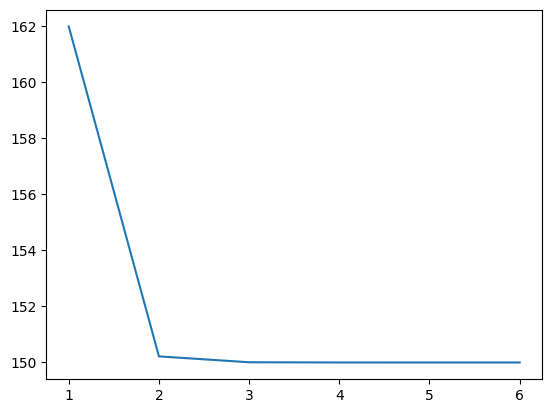

In [5]:
fig, ax = plt.subplots()
ax.plot(range(1,7), plot_z)
plt.show()

#### 02.1.2 重新计算贡献值的单变量反向传播

In [6]:
w = 3
b = 4
plot_z = []
while(True):
    x,y,z = target_function(w,b)
    delta_z = z - t
    plot_z.append(z)
    print("w=%f,b=%f,z=%f,delta_z=%f"%(w,b,z,delta_z))
    if abs(delta_z) < error:
        break
    #在这里重新计算了贡献值
    factor_b = 2*x+3*y
    delta_b = delta_z/factor_b
    print("factor_b=%f, delta_b=%f"%(factor_b, delta_b))
    b = b - delta_b

print("done!")
print("final b=%f"%b)

w=3.000000,b=4.000000,z=162.000000,delta_z=12.000000
factor_b=63.000000, delta_b=0.190476
w=3.000000,b=3.809524,z=150.217687,delta_z=0.217687
factor_b=60.714286, delta_b=0.003585
w=3.000000,b=3.805938,z=150.000077,delta_z=0.000077
factor_b=60.671261, delta_b=0.000001
w=3.000000,b=3.805937,z=150.000000,delta_z=0.000000
done!
final b=3.805937


只用了四次迭代，画图展示$z$的变化过程：

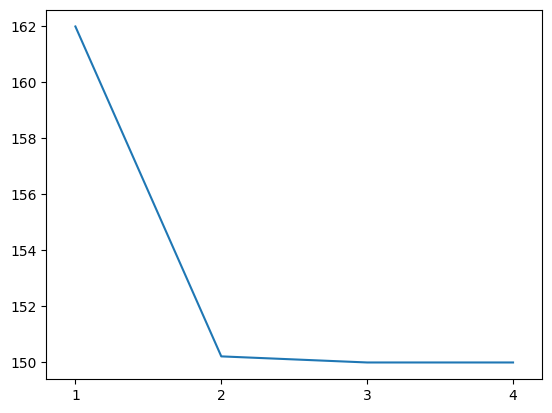

In [7]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 5), plot_z)
ax.set(xlim=(0.8, 4.2), xticks=np.arange(1, 5))
plt.show()

#### 02.1.3 双变量反向传播
$$
\Delta b=\frac{\Delta z / 2}{63} = \frac{12/2}{63}=0.095
$$

$$
\Delta w=\frac{\Delta z / 2}{18} = \frac{12/2}{18}=0.333
$$

In [8]:
w = 3
b = 4
plot_b = []
plot_w = []
while(True):
    x,y,z = target_function(w,b)
    delta_z = z - t
    plot_b.append(b)
    plot_w.append(w)
    print("w=%f,b=%f,z=%f,delta_z=%f"%(w,b,z,delta_z))
    if abs(delta_z) < error:
        break
    #根据上述公式，计算b和w的差值
    delta_b = delta_z/63/2
    delta_w = delta_z/18/2
    print("delta_b=%f, delta_w=%f"%(delta_b,delta_w))
    b = b - delta_b
    w = w - delta_w
print("done!")
print("final b=%f"%b)
print("final w=%f"%w)

w=3.000000,b=4.000000,z=162.000000,delta_z=12.000000
delta_b=0.095238, delta_w=0.333333
w=2.666667,b=3.904762,z=150.181406,delta_z=0.181406
delta_b=0.001440, delta_w=0.005039
w=2.661628,b=3.903322,z=150.005526,delta_z=0.005526
delta_b=0.000044, delta_w=0.000154
w=2.661474,b=3.903278,z=150.000170,delta_z=0.000170
delta_b=0.000001, delta_w=0.000005
w=2.661469,b=3.903277,z=150.000005,delta_z=0.000005
done!
final b=3.903277
final w=2.661469


迭代了五次，画图展示$w$和$b$的变化过程：

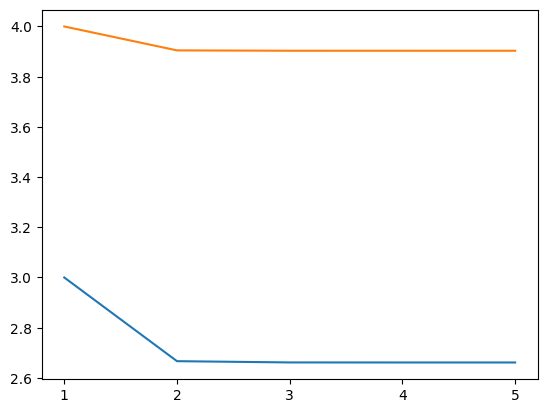

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 6), plot_w)
ax.plot(np.arange(1, 6), plot_b)
ax.set(xlim=(0.8, 5.2), xticks=np.arange(1, 6))
plt.show()

#### 02.1.4 重新计算贡献值的双变量反向传播

In [10]:
w = 3
b = 4
while(True):
    x,y,z = target_function(w,b)
    delta_z = z - t
    print("w=%f,b=%f,z=%f,delta_z=%f"%(w,b,z,delta_z))
    if abs(delta_z) < error:
        break
    
    #重新计算b和w的贡献值
    factor_b = 2*x+3*y
    factor_w = 2*y
    delta_b = delta_z/factor_b/2
    delta_w = delta_z/factor_w/2
    print("factor_b=%f, factor_w=%f, delta_b=%f, delta_w=%f"%(factor_b, factor_w, delta_b,delta_w))
    b = b - delta_b
    w = w - delta_w
print("done!")
print("final b=%f"%b)
print("final w=%f"%w)


w=3.000000,b=4.000000,z=162.000000,delta_z=12.000000
factor_b=63.000000, factor_w=18.000000, delta_b=0.095238, delta_w=0.333333
w=2.666667,b=3.904762,z=150.181406,delta_z=0.181406
factor_b=60.523810, factor_w=17.619048, delta_b=0.001499, delta_w=0.005148
w=2.661519,b=3.903263,z=150.000044,delta_z=0.000044
factor_b=60.485234, factor_w=17.613053, delta_b=0.000000, delta_w=0.000001
w=2.661517,b=3.903263,z=150.000000,delta_z=0.000000
done!
final b=3.903263
final w=2.661517


迭代了三次，比不重新计算贡献值有明显进步。